In [2]:
from ovito.io import import_file, export_file
from ovito.modifiers import BondAnalysisModifier, CreateBondsModifier

from matplotlib import pyplot as plt
import numpy as np


# Set up data pipeline:
pipeline = import_file('/home/agoga/documents/code/topcon-md/output-save/SilicaAttemptDeform/silicaanneal.dump')
pipeline.modifiers.append(CreateBondsModifier(cutoff = 2))
pipeline.modifiers.append(BondAnalysisModifier(bins = 200))

# Export bond angle distribution to an output text file.
export_file(pipeline, 'output/bond_angles.txt', 'txt/table', key='bond-angle-distr')

# Convert bond length histogram to a NumPy array and print it to the terminal.
data = pipeline.compute()

lentab=data.tables['bond-length-distr'].xy()
angletab=data.tables['bond-angle-distr'].xy()



[  0.45   1.35   2.25   3.15   4.05   4.95   5.85   6.75   7.65   8.55
   9.45  10.35  11.25  12.15  13.05  13.95  14.85  15.75  16.65  17.55
  18.45  19.35  20.25  21.15  22.05  22.95  23.85  24.75  25.65  26.55
  27.45  28.35  29.25  30.15  31.05  31.95  32.85  33.75  34.65  35.55
  36.45  37.35  38.25  39.15  40.05  40.95  41.85  42.75  43.65  44.55
  45.45  46.35  47.25  48.15  49.05  49.95  50.85  51.75  52.65  53.55
  54.45  55.35  56.25  57.15  58.05  58.95  59.85  60.75  61.65  62.55
  63.45  64.35  65.25  66.15  67.05  67.95  68.85  69.75  70.65  71.55
  72.45  73.35  74.25  75.15  76.05  76.95  77.85  78.75  79.65  80.55
  81.45  82.35  83.25  84.15  85.05  85.95  86.85  87.75  88.65  89.55
  90.45  91.35  92.25  93.15  94.05  94.95  95.85  96.75  97.65  98.55
  99.45 100.35 101.25 102.15 103.05 103.95 104.85 105.75 106.65 107.55
 108.45 109.35 110.25 111.15 112.05 112.95 113.85 114.75 115.65 116.55
 117.45 118.35 119.25 120.15 121.05 121.95 122.85 123.75 124.65 125.55
 126.4

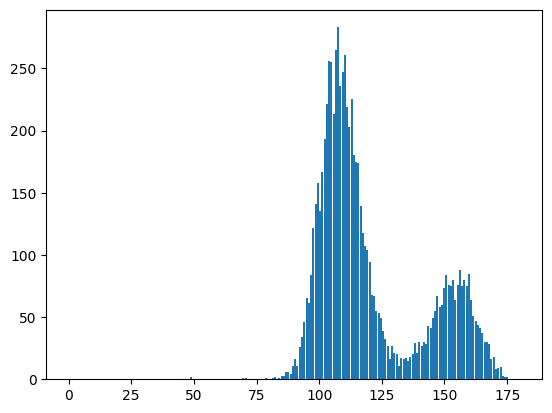

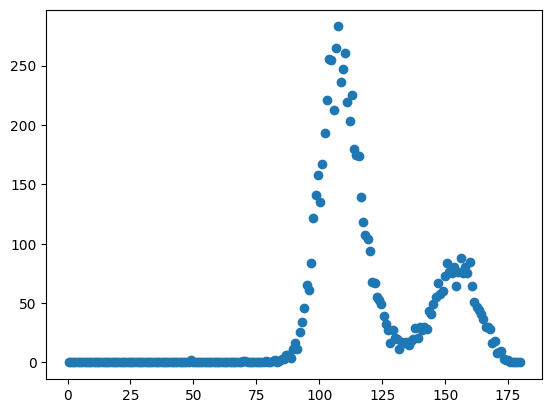

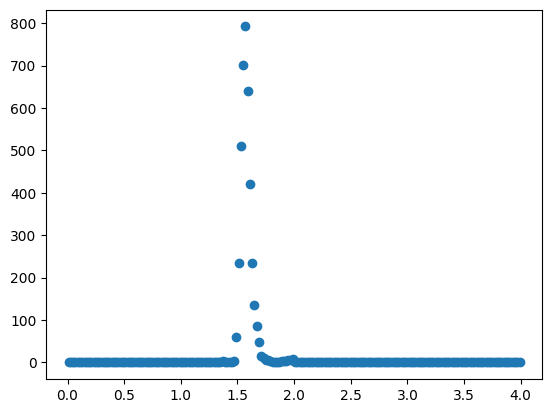

Peak Bond Angle:107.55
Peak Bond Length:1.57


In [8]:

bins = angletab[:,0]
counts=angletab[:,1]
print(bins)
plt.bar(bins,counts)
plt.show()
plt.scatter(angletab[:,0],angletab[:,1])
plt.show()

plt.scatter(lentab[:,0],lentab[:,1])
plt.show()
anglebins=angletab[:,0]
bondbins=lentab[:,0]

print("Peak Bond Angle:{:.2f}".format(anglebins[np.argmax(angletab[:,1])]))
print("Peak Bond Length:{}".format(bondbins[np.argmax(lentab[:,1])]))

